## Problem: N-Queens

The n-queens puzzle is the problem of placing `n` queens on an `n x n` chessboard such that no two queens attack each other.

Given an integer `n`, return all *distinct solutions* to the n-queens puzzle. You may return the answer in any order.

Each solution contains a distinct board configuration of the n-queens' placement, where `Q` and `.` both indicate a queen and an empty space, respectively.

*Example:*

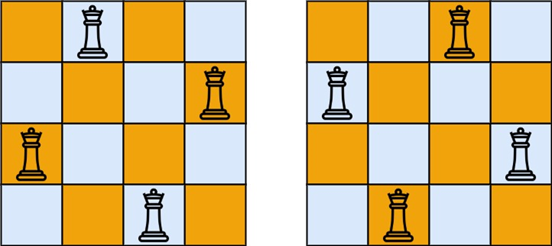

```
Input: n = 4
Output: [[".Q..","...Q","Q...","..Q."],["..Q.","Q...","...Q",".Q.."]]
Explanation: There exist two distinct solutions to the 4-queens puzzle as shown above
```

my code works, but is unfortunately too slow :( This is using recursion + memoization

1. DP with memoization is usually faster than pure backtracking for problems with overlapping subproblems.
2. For the N-Queens problem specifically, backtracking is often more efficient. Here's why:
    - Limited overlapping subproblems: The N-Queens problem doesn't have many overlapping subproblems, which reduces the benefit of memoization.
    - Early pruning: Backtracking can eliminate invalid board states early, avoiding unnecessary computations.
    - Memory usage: DP with memoization stores all intermediate results, which can be memory-intensive for large N.
    - State representation: The state space for N-Queens is large, making it challenging to effectively memoize all states.

In [101]:
#mysol
#merge i and n arguments into a single argument


from functools import lru_cache, cache
import copy
class Solution:
    def solveNQueens(self, n: int):
        empty=tuple(('.',)*n for _ in range(n))
        all=self.dfs(0,n,empty)
        #convert all the xs to dots
        l=[[s.replace('x', '.') for s in board] for board in all]

        return l
    
    @lru_cache(None)
    def dfs(self,i,n,state):
        '''
        tries to add a queen recursively
        return the board

        state here is always a tuple of strings, so that we can cache stuff
        '''
        #successfully placed n queens
        if i==n:
            #print('found a board',state)
            return set((tuple(''.join(row) for row in state),))

        #list of board states
        res=set()

        for row in range(n):
            for col in range(n):
                if state[row][col]=='.':
                    #print('going to add',i+1,'queen, at position',row,col)
                    #print('before adding',i+1, 'queen',state)
                    board=self.mark((row,col),n, state)
                    if board!=False:
                        #concat this sol
                        res=res.union(self.dfs(i+1,n,board))
                    #make the other squares unavailable:
        return res

    def mark(self,position,n,state):
        '''
        I want to place a new queen at `position` (i,j)
        Mark all the relevant squares as attacked, and return the new state
        If I attack any other queens, this is not possible, then return False

        state is represented as a tuple of strings. convert to a list of lists, manipulate, then return as a tuple of strings.

        Queens are represented with 'Q'
        Empty spaces are represented with '.'
        Attacked spaces are represented with 'x'
        '''
        i,j=position

        #convert to a list of lists for manipulation
        state=[list(string) for string in state]

        #mark attacked positions
        for row in range(n):
            for col in range(n):
                
                #first check is to mark horizontally
                #second check is to mark vertically
                #The third check is to see if the elem lies on \ diagonal. we first offset both patches to the patch (0,0) and compare along the long diagonal like identity matrix
                #fourth check is to see if elem lies on / diagonal
                if (row==i or 
                    col==j or
                    row-i==col-j or
                    i-row==col-j):
                    if state[row][col]=='Q':
                        return False
                    state[row][col]='x'

        #mark the queen
        state[i][j]='Q'

        #convert back to a tuple of strings
        return tuple(''.join(inner) for inner in state)


sol=Solution()
print(sol.solveNQueens(9))
#print(sol.mark((0,0),4,[['.', '.', '.', '.'], ['.', '.', '.', '.'], ['.', '.', '.', '.'], ['.', '.', '.', '.']]))

[['....Q....', '......Q..', '.Q.......', '.....Q...', '..Q......', 'Q........', '.......Q.', '...Q.....', '........Q'], ['...Q.....', '.....Q...', 'Q........', '....Q....', '.Q.......', '.......Q.', '..Q......', '......Q..', '........Q'], ['...Q.....', '......Q..', '........Q', '.....Q...', '..Q......', 'Q........', '.......Q.', '....Q....', '.Q.......'], ['...Q.....', '.....Q...', '..Q......', '........Q', '.Q.......', '.......Q.', '....Q....', '......Q..', 'Q........'], ['......Q..', '........Q', '...Q.....', '.Q.......', '....Q....', '.......Q.', '.....Q...', 'Q........', '..Q......'], ['..Q......', '.......Q.', '.Q.......', '...Q.....', '........Q', '......Q..', '....Q....', 'Q........', '.....Q...'], ['..Q......', '........Q', '...Q.....', '.......Q.', '....Q....', '.Q.......', '.....Q...', 'Q........', '......Q..'], ['.......Q.', '...Q.....', '......Q..', '........Q', '.Q.......', '.....Q...', 'Q........', '..Q......', '....Q....'], ['........Q', '.....Q...', '...Q.....', '......

Backtracking implementation
- everytime we place a queen, we always do it on a new row
  - update the forbidden columns, \ diagonals and / diagonals

In [ ]:
class Solution:
    def solveNQueens(self, n: int):
        #these 3 sets are the only information we need!
        #these basically contain information about our 'forbidden' patches
        col = set()
        posDiag = set()
        negDiag = set()

        res = []
        board = [["."] * n for i in range(n)]

        #backtrack over the rows
        def backtrack(r):
            #we have placed n queens
            if r == n:
                #create a copy of the board
                copy = ["".join(row) for row in board]
                res.append(copy)
                return

            #iterate over the columns
            for c in range(n):
                #cannot add the queen here
                if c in col or (r + c) in posDiag or (r - c) in negDiag:
                    continue

                #if we do choose to add the queen at r,c then
                
                #add to the forbidden columns
                col.add(c)
                #along a / diagonal, row+col is a constant value - similar to row==-col
                posDiag.add(r + c)
                #along a \ diagonal, row-col is a constant value - similar to row==col
                negDiag.add(r - c)

                #update our board. Our board only contains Q and .
                board[r][c] = "Q"

                #backtrack to a new row!
                backtrack(r + 1)

                #start reversing/backtracking
                #this is important as board is updated in real time, to allow for other paths to explore
                col.remove(c)
                posDiag.remove(r + c)
                negDiag.remove(r - c)
                board[r][c] = "."

        backtrack(0)
        return res
